In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use(style='seaborn')
df=pd.read_csv('/home/nmit/Downloads/archive/all-data.csv',encoding = "ISO-8859-1")
print(df.head())

  Sentiment                                      News Headline Unnamed: 2  \
0   neutral  According to Gran , the company has no plans t...        NaN   
1   neutral  Technopolis plans to develop in stages an area...        NaN   
2  negative  The international electronic industry company ...        NaN   
3  positive  With the new production plant the company woul...        NaN   
4  positive  According to the company 's updated strategy f...        NaN   

  Unnamed: 3  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sentiment      4846 non-null   object
 1   News Headline  4846 non-null   object
 2   Unnamed: 2     9 non-null      object
 3   Unnamed: 3     2 non-null      object
dtypes: object(4)
memory usage: 151.6+ KB


In [12]:
df.isna().sum()

Sentiment           0
News Headline       0
Unnamed: 2       4837
Unnamed: 3       4844
dtype: int64

In [ ]:
#The data is just perfect,

In [13]:
df['Sentiment'].value_counts()

Sentiment
neutral     2879
positive    1363
negative     604
Name: count, dtype: int64

In [14]:
# Feature Extraction

In [15]:
y=df['Sentiment'].values
y.shape

(4846,)

In [16]:
x=df['News Headline'].values

In [17]:
x.shape

(4846,)

In [18]:
#Train-Test Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.4)
x_train.shape
y_train.shape
x_test.shape
y_test.shape

(1939,)

In [21]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'news'})

In [22]:
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)

In [23]:
df_train.head()

,news,sentiment
0,: Lietuvos Respublikos sveikatos apsaugos mini...,positive
1,The company moved to an operating profit of EU...,positive
2,The major part of the deliveries include diffe...,neutral
3,The money will be spent `` on strengthening th...,positive
4,The company is now withdrawing the second part...,neutral


In [24]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'news'})

In [25]:
df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)

In [26]:
df_test.head()

,news,sentiment
0,Stora Enso Oyj said its second-quarter result ...,positive
1,credit 20 November 2009 - Finnish glass techno...,positive
2,The shopping center to be opened in St. Peters...,neutral
3,Operating profit rose to EUR 27.8 mn from EUR ...,positive
4,Consumption is forecast to grow by about 2 % .,neutral


In [27]:
#Basic Pre-Processing of Train and Test Data

In [28]:
#removing punctuations
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
#defining the function to remove punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

In [30]:
#storing the puntuation free text in a new column called clean_msg
df_train['news']= df_train['news'].apply(lambda x:remove_punctuation(x))
df_test['news']= df_test['news'].apply(lambda x:remove_punctuation(x))

In [31]:
df_train.head()
#punctuations are removed from news column in train dataset

,news,sentiment
0,Lietuvos Respublikos sveikatos apsaugos minis...,positive
1,The company moved to an operating profit of EU...,positive
2,The major part of the deliveries include diffe...,neutral
3,The money will be spent on strengthening the ...,positive
4,The company is now withdrawing the second part...,neutral


In [32]:
#we have to remove stopwords from the news column. For this, let’s use the stopwords provided by nltk 

In [33]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/nmit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
#Code to Generate N-grams

In [35]:
#code a custom function to generate n-grams for a given text

In [36]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)

In [37]:
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [38]:
#sample!
generate_N_grams("The sun rises in the east",2)

Sentence after removing stopwords: ['The', 'sun', 'rises', 'east']


['The sun', 'sun rises', 'rises east']

In [39]:
#Creating Unigrams

In [40]:
from collections import defaultdict

In [41]:
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [42]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

Sentence after removing stopwords: ['', 'Lietuvos', 'Respublikos', 'sveikatos', 'apsaugos', 'ministerija', 'awarded', 'contract', 'UAB', '', 'AFFECTO', 'LIETUVA', '', 'financial', 'systems', 'software', 'package', '']
Sentence after removing stopwords: ['The', 'company', 'moved', 'operating', 'profit', 'EUR10', '9', 'versus', 'operating', 'loss', 'EUR15', '3', 'It', 'also', 'turned', 'EPS', 'EUR0', '08', 'versus', 'loss', 'per', 'share', 'EUR0', '04', '']
Sentence after removing stopwords: ['The', 'money', 'spent', '', 'strengthening', 'company', 'competitiveness', 'sphere', 'sawmill', 'products', 'increasing', 'volume', 'wood', 'delivered', 'processing', 'Russia', '', '', 'release', 'says', '']
Sentence after removing stopwords: ['With', 'appointment', 'Kaupthing', 'Bank', 'aims', 'coordinate', 'Capital', 'Markets', 'activities', 'within', 'Group', 'improve', 'overall', 'service', 'clients', '']
Sentence after removing stopwords: ['Revenue', 'grew', '2', 'percent', '', 'x20ac', '580',

In [43]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

Sentence after removing stopwords: ['Swedbank', 'shares', 'hardest', 'hit', 'Swedish', 'banks', 'ongoing', 'international', 'financial', 'crisis', '']
Sentence after removing stopwords: ['Earnings', 'per', 'share', '', 'EPS', '', 'amounted', 'EUR1', '37', '', 'EUR2', '30', '']
Sentence after removing stopwords: ['According', 'CEO', 'Matti', 'Perkonoja', 'parent', 'company', 'HKScan', '', 'company', 'performance', 'first', 'quarter', '2010', 'remained', 'clearly', 'level', 'corresponding', 'period', '2009', '']
Sentence after removing stopwords: ['ADP', 'News', '', 'Apr', '22', '', '2009', '', 'Finnish', 'business', 'information', 'systems', 'developer', 'Solteq', 'Oyj', 'HEL', '', 'STQ1V', 'said', 'today', 'net', 'loss', 'widened', 'EUR', '189000', 'USD', '245000', 'first', 'quarter', '2009', 'EUR', '10000', 'peri']
Sentence after removing stopwords: ['Operating', 'profit', 'sixmonth', 'period', 'decreased', 'EUR21m', '', 'net', 'sales', 'increased', 'EUR436', '9', '', 'compared', 'cor

In [44]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

Sentence after removing stopwords: ['The', 'major', 'part', 'deliveries', 'include', 'different', 'AC', 'CXE', 'amplifier', 'solutions', 'products', 'DINH', 'Telecom', '', 'company', 'acquired', 'Teleste', 'last', 'spring', '']
Sentence after removing stopwords: ['The', 'company', 'withdrawing', 'second', 'part', '', 'EUR', '72', 'mn', '', 'investment', 'commitment', '']
Sentence after removing stopwords: ['The', 'technology', 'park', 'built', 'near', 'St', 'Petersburgbased', 'Pulkovo', 'airport', '']
Sentence after removing stopwords: ['6', 'October', '2010', '', 'Finnish', 'paints', 'coatings', 'company', 'Tikkurila', 'Oyj', 'HEL', '', 'TIK1V', 'announced', 'today', 'launch', 'Tikkurila', 'ProHouse', 'method', 'protection', 'wooden', 'surfaces', 'via', 'treatment', 'Ultra', 'Pro', 'waterborne', 'products', '']
Sentence after removing stopwords: ['Also', '', 'Technopolis', 'plans', 'build', '100', 'million', 'euro', 'technology', 'park', 'special', 'economic', 'zone', 'Neudorf', 'St',

In [45]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [46]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

In [47]:
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

In [48]:
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

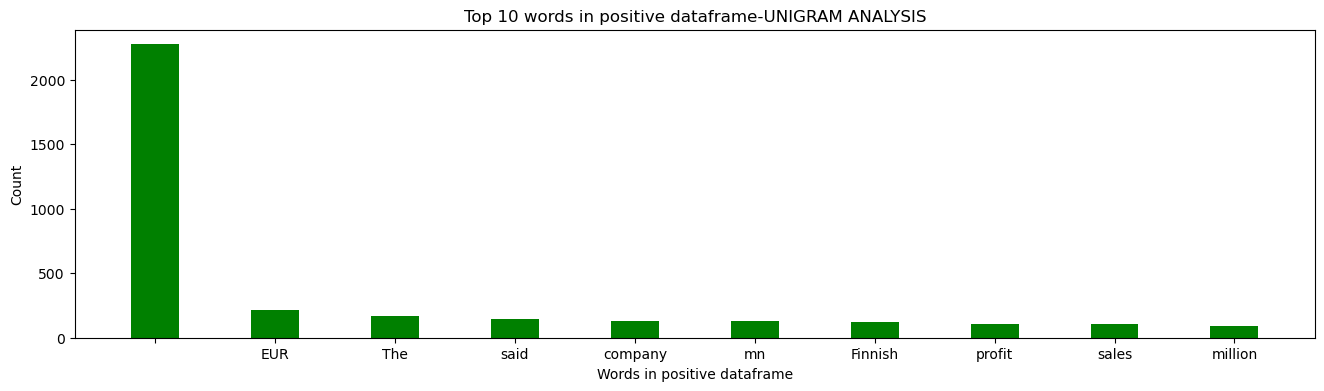

In [49]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

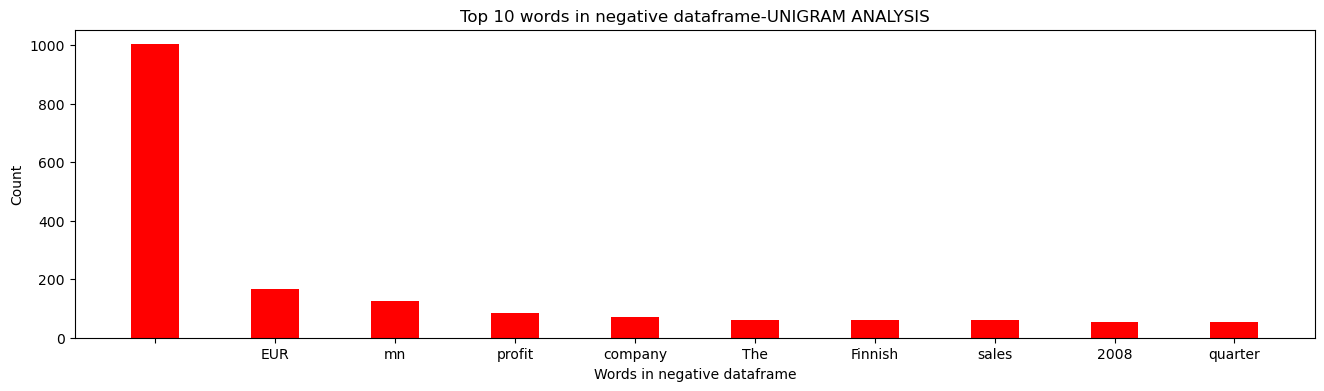

In [50]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

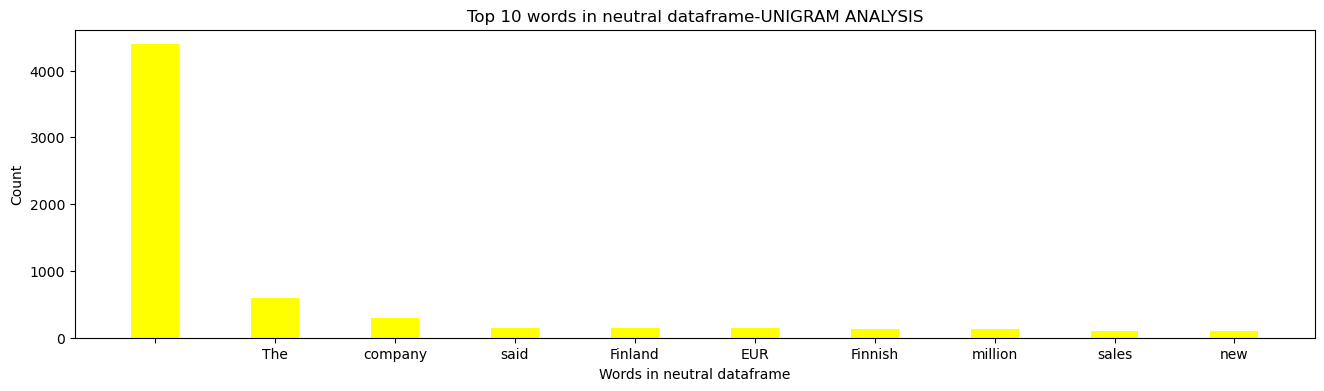

In [51]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")
plt.show()

In [52]:
#Creating Bigrams

In [53]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [54]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

Sentence after removing stopwords: ['', 'Lietuvos', 'Respublikos', 'sveikatos', 'apsaugos', 'ministerija', 'awarded', 'contract', 'UAB', '', 'AFFECTO', 'LIETUVA', '', 'financial', 'systems', 'software', 'package', '']
Sentence after removing stopwords: ['The', 'company', 'moved', 'operating', 'profit', 'EUR10', '9', 'versus', 'operating', 'loss', 'EUR15', '3', 'It', 'also', 'turned', 'EPS', 'EUR0', '08', 'versus', 'loss', 'per', 'share', 'EUR0', '04', '']
Sentence after removing stopwords: ['The', 'money', 'spent', '', 'strengthening', 'company', 'competitiveness', 'sphere', 'sawmill', 'products', 'increasing', 'volume', 'wood', 'delivered', 'processing', 'Russia', '', '', 'release', 'says', '']
Sentence after removing stopwords: ['With', 'appointment', 'Kaupthing', 'Bank', 'aims', 'coordinate', 'Capital', 'Markets', 'activities', 'within', 'Group', 'improve', 'overall', 'service', 'clients', '']
Sentence after removing stopwords: ['Revenue', 'grew', '2', 'percent', '', 'x20ac', '580',

In [55]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

Sentence after removing stopwords: ['Swedbank', 'shares', 'hardest', 'hit', 'Swedish', 'banks', 'ongoing', 'international', 'financial', 'crisis', '']
Sentence after removing stopwords: ['Earnings', 'per', 'share', '', 'EPS', '', 'amounted', 'EUR1', '37', '', 'EUR2', '30', '']
Sentence after removing stopwords: ['According', 'CEO', 'Matti', 'Perkonoja', 'parent', 'company', 'HKScan', '', 'company', 'performance', 'first', 'quarter', '2010', 'remained', 'clearly', 'level', 'corresponding', 'period', '2009', '']
Sentence after removing stopwords: ['ADP', 'News', '', 'Apr', '22', '', '2009', '', 'Finnish', 'business', 'information', 'systems', 'developer', 'Solteq', 'Oyj', 'HEL', '', 'STQ1V', 'said', 'today', 'net', 'loss', 'widened', 'EUR', '189000', 'USD', '245000', 'first', 'quarter', '2009', 'EUR', '10000', 'peri']
Sentence after removing stopwords: ['Operating', 'profit', 'sixmonth', 'period', 'decreased', 'EUR21m', '', 'net', 'sales', 'increased', 'EUR436', '9', '', 'compared', 'cor

In [56]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1

Sentence after removing stopwords: ['The', 'major', 'part', 'deliveries', 'include', 'different', 'AC', 'CXE', 'amplifier', 'solutions', 'products', 'DINH', 'Telecom', '', 'company', 'acquired', 'Teleste', 'last', 'spring', '']
Sentence after removing stopwords: ['The', 'company', 'withdrawing', 'second', 'part', '', 'EUR', '72', 'mn', '', 'investment', 'commitment', '']
Sentence after removing stopwords: ['The', 'technology', 'park', 'built', 'near', 'St', 'Petersburgbased', 'Pulkovo', 'airport', '']
Sentence after removing stopwords: ['6', 'October', '2010', '', 'Finnish', 'paints', 'coatings', 'company', 'Tikkurila', 'Oyj', 'HEL', '', 'TIK1V', 'announced', 'today', 'launch', 'Tikkurila', 'ProHouse', 'method', 'protection', 'wooden', 'surfaces', 'via', 'treatment', 'Ultra', 'Pro', 'waterborne', 'products', '']
Sentence after removing stopwords: ['Also', '', 'Technopolis', 'plans', 'build', '100', 'million', 'euro', 'technology', 'park', 'special', 'economic', 'zone', 'Neudorf', 'St',

In [57]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

In [58]:
df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

In [59]:
pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

In [60]:
ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

In [61]:
nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

In [62]:
plt.figure(1,figsize=(16,4))

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<BarContainer object of 10 artists>

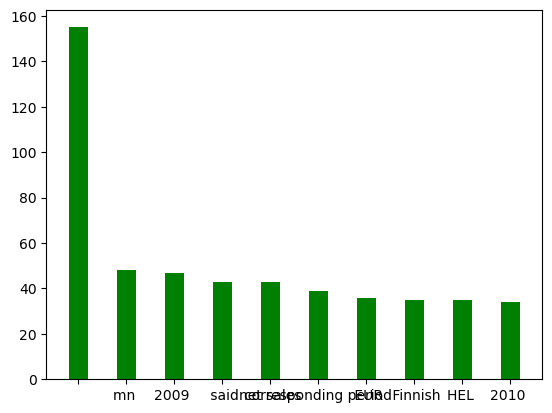

In [63]:
plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)

Text(0.5, 0, 'Words in positive dataframe')

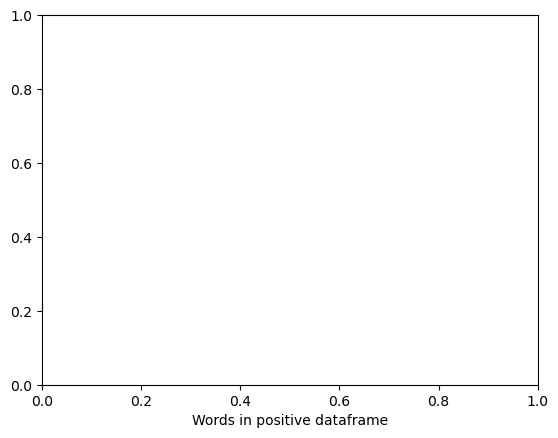

In [64]:
plt.xlabel("Words in positive dataframe")

Text(0, 0.5, 'Count')

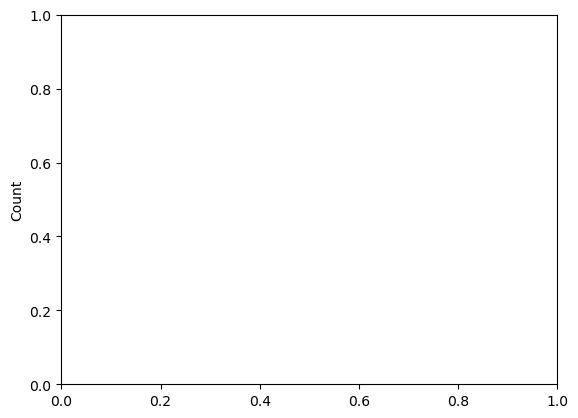

In [65]:
plt.ylabel("Count")

Text(0.5, 1.0, 'Top 10 words in positive dataframe-BIGRAM ANALYSIS')

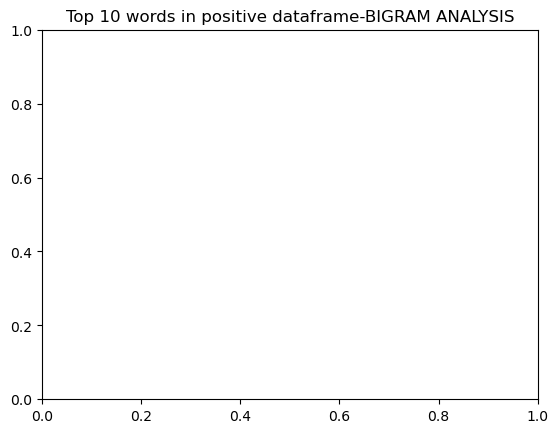

In [66]:
plt.title("Top 10 words in positive dataframe-BIGRAM ANALYSIS")

In [67]:
plt.savefig("positive-bigram.png")
plt.show()

<Figure size 640x480 with 0 Axes>

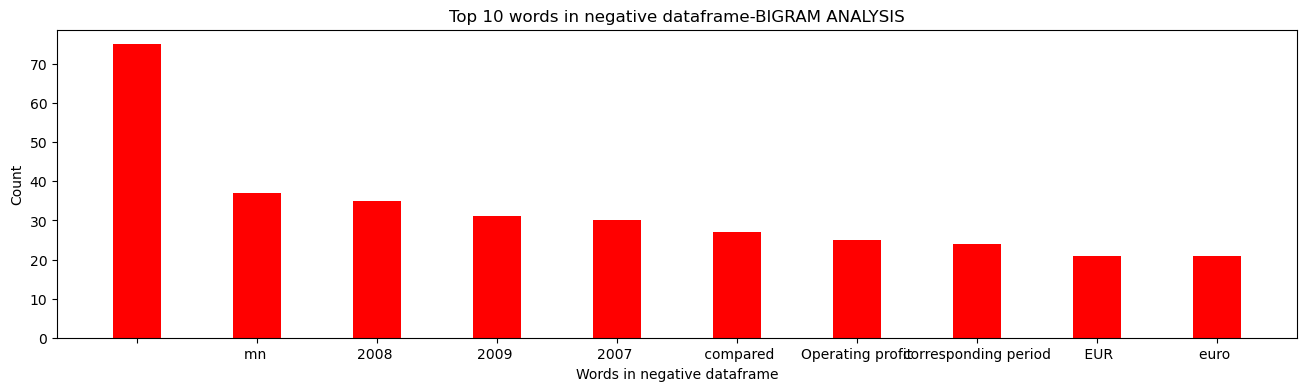

In [68]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-BIGRAM ANALYSIS")
plt.savefig("negative-bigram.png")
plt.show()

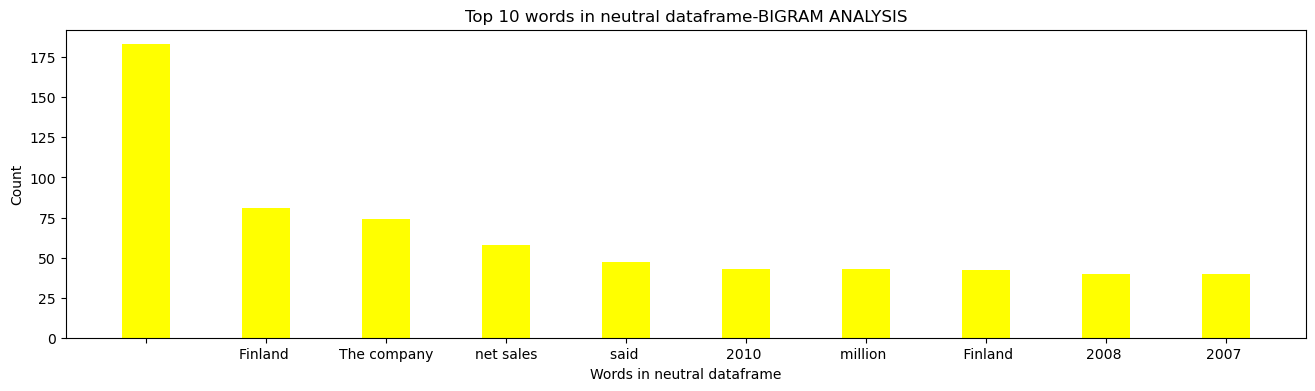

In [69]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-BIGRAM ANALYSIS")
plt.savefig("neutral-bigram.png")
plt.show()

In [70]:
#Creating Trigrams

In [71]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [72]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

Sentence after removing stopwords: ['', 'Lietuvos', 'Respublikos', 'sveikatos', 'apsaugos', 'ministerija', 'awarded', 'contract', 'UAB', '', 'AFFECTO', 'LIETUVA', '', 'financial', 'systems', 'software', 'package', '']
Sentence after removing stopwords: ['The', 'company', 'moved', 'operating', 'profit', 'EUR10', '9', 'versus', 'operating', 'loss', 'EUR15', '3', 'It', 'also', 'turned', 'EPS', 'EUR0', '08', 'versus', 'loss', 'per', 'share', 'EUR0', '04', '']
Sentence after removing stopwords: ['The', 'money', 'spent', '', 'strengthening', 'company', 'competitiveness', 'sphere', 'sawmill', 'products', 'increasing', 'volume', 'wood', 'delivered', 'processing', 'Russia', '', '', 'release', 'says', '']
Sentence after removing stopwords: ['With', 'appointment', 'Kaupthing', 'Bank', 'aims', 'coordinate', 'Capital', 'Markets', 'activities', 'within', 'Group', 'improve', 'overall', 'service', 'clients', '']
Sentence after removing stopwords: ['Revenue', 'grew', '2', 'percent', '', 'x20ac', '580',

In [73]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

Sentence after removing stopwords: ['Swedbank', 'shares', 'hardest', 'hit', 'Swedish', 'banks', 'ongoing', 'international', 'financial', 'crisis', '']
Sentence after removing stopwords: ['Earnings', 'per', 'share', '', 'EPS', '', 'amounted', 'EUR1', '37', '', 'EUR2', '30', '']
Sentence after removing stopwords: ['According', 'CEO', 'Matti', 'Perkonoja', 'parent', 'company', 'HKScan', '', 'company', 'performance', 'first', 'quarter', '2010', 'remained', 'clearly', 'level', 'corresponding', 'period', '2009', '']
Sentence after removing stopwords: ['ADP', 'News', '', 'Apr', '22', '', '2009', '', 'Finnish', 'business', 'information', 'systems', 'developer', 'Solteq', 'Oyj', 'HEL', '', 'STQ1V', 'said', 'today', 'net', 'loss', 'widened', 'EUR', '189000', 'USD', '245000', 'first', 'quarter', '2009', 'EUR', '10000', 'peri']
Sentence after removing stopwords: ['Operating', 'profit', 'sixmonth', 'period', 'decreased', 'EUR21m', '', 'net', 'sales', 'increased', 'EUR436', '9', '', 'compared', 'cor

In [74]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

Sentence after removing stopwords: ['The', 'major', 'part', 'deliveries', 'include', 'different', 'AC', 'CXE', 'amplifier', 'solutions', 'products', 'DINH', 'Telecom', '', 'company', 'acquired', 'Teleste', 'last', 'spring', '']
Sentence after removing stopwords: ['The', 'company', 'withdrawing', 'second', 'part', '', 'EUR', '72', 'mn', '', 'investment', 'commitment', '']
Sentence after removing stopwords: ['The', 'technology', 'park', 'built', 'near', 'St', 'Petersburgbased', 'Pulkovo', 'airport', '']
Sentence after removing stopwords: ['6', 'October', '2010', '', 'Finnish', 'paints', 'coatings', 'company', 'Tikkurila', 'Oyj', 'HEL', '', 'TIK1V', 'announced', 'today', 'launch', 'Tikkurila', 'ProHouse', 'method', 'protection', 'wooden', 'surfaces', 'via', 'treatment', 'Ultra', 'Pro', 'waterborne', 'products', '']
Sentence after removing stopwords: ['Also', '', 'Technopolis', 'plans', 'build', '100', 'million', 'euro', 'technology', 'park', 'special', 'economic', 'zone', 'Neudorf', 'St',

In [75]:
df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

In [76]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]

In [77]:
ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]

In [78]:
nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

Text(0.5, 1.0, 'Top 10 words in positive dataframe-TRIGRAM ANALYSIS')

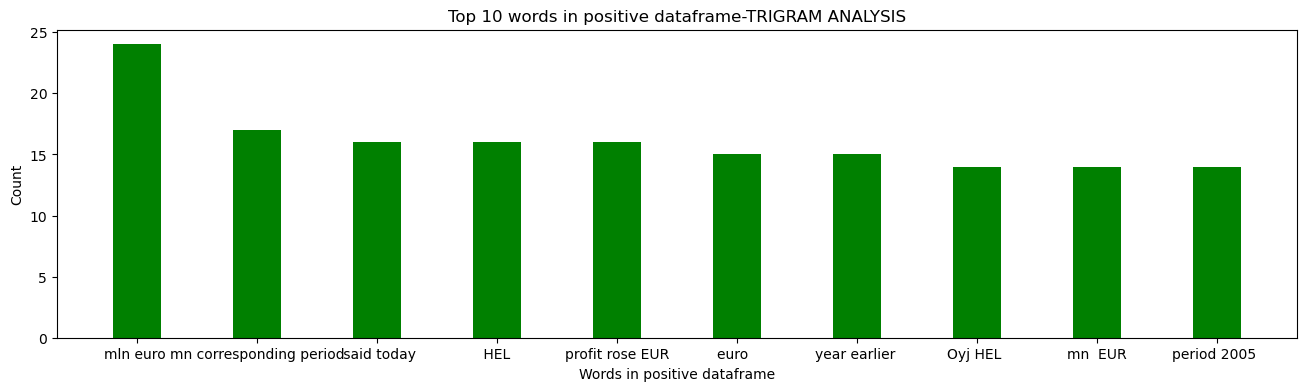

In [79]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-TRIGRAM ANALYSIS")

In [80]:
plt.savefig("positive-trigram.png")

<Figure size 640x480 with 0 Axes>

In [81]:
plt.show()

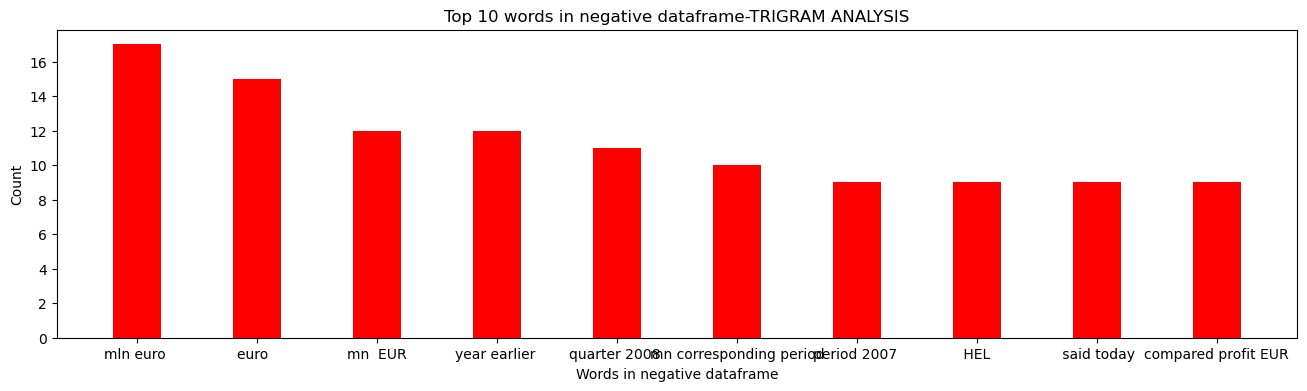

In [82]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4) 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-TRIGRAM ANALYSIS")
plt.savefig("negative-trigram.png")
plt.show()

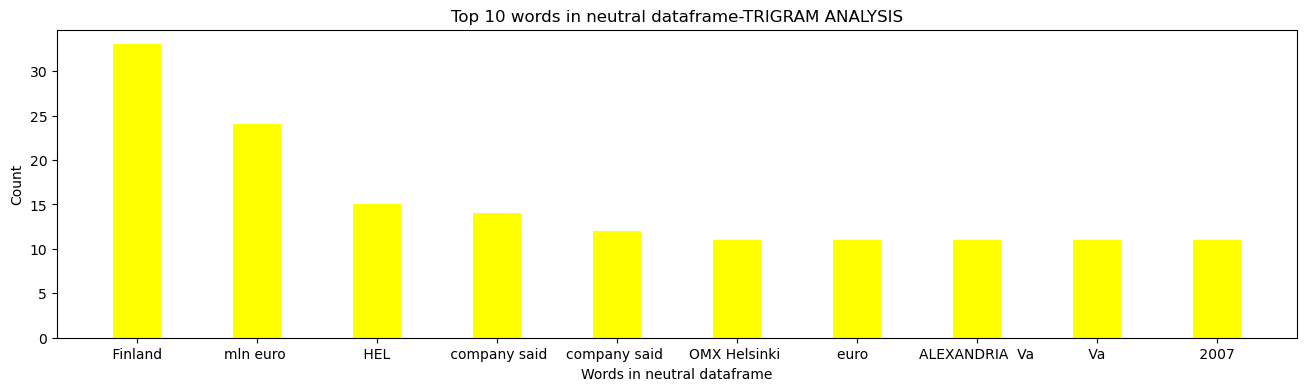

In [83]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4) 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-TRIGRAM ANALYSIS")
plt.savefig("neutral-trigram.png")
plt.show()

In [84]:
#Results of the Model

In [ ]:
#From the above graphs, we can conclude that trigrams perform the best on our train data.
#This is because it provides more useful words frequently, such as profit rose EUR, a year earlier for the positive data frame,
#corresponding period, period 2007, names of companies such as HEL for the negative data frame and Finland, 
#the company said and again names of companies such as HEL, OMX Helsinki and so on for the neutral data frame.